<h1><center>ItClust Tutorial</center></h1>


<center>Author: Jian Hu, Xiangjie Li, Gang Hu, Yafei Lyu, Katalin Susztak, Mingyao Li*</center>

### 0. Import python modules

In [1]:
import ItClust as ic
import scanpy.api as sc
import os
from numpy.random import seed
from tensorflow import set_random_seed
import pandas as pd
import numpy as np
import warnings
os.environ["CUDA_VISIBLE_DEVICES"]="1"
warnings.filterwarnings("ignore")
#import sys
#!{sys.executable} -m pip install 'scanpy==1.4.4.post1'
#Set seeds
seed(20180806)
np.random.seed(10)
set_random_seed(20180806) # on GPU may be some other default


Using TensorFlow backend.
/Users/hujian1/anaconda3/envs/keras/lib/python3.7/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning


### 1. Read in data
The current version of ItClust works with an AnnData object. AnnData stores a data matrix .X together with annotations of observations .obs, variables .var and unstructured annotations .uns. The ItClust package provides 3 ways to prepare an AnnData object for the following analysis.
<br>
ItClust support most forms of the scRNAseq data, including UMI, TPM, FPKM.
<br>
<br>
Important Note: For the source data, please store the true celltype label information in one column named "celltype".

#### 1.1 Start from a 10X dataset
Here we use the pbmc data as an example:
Download the data and unzip it. Then move everything in filtered_gene_bc_matrices/hg19/ to data/pbmc/.

In [2]:
adata = read_10X(data_path='./data/pbmc')

var_names are not unique, "make_index_unique" has applied


#### 1.2  Start from *.mtx and *.tsv files
When the expression data do not follow the standard 10X dataset format, we can manually import the data as follows.

In [36]:
#1 Read the expression matrix from *.mtx file.
# The row of this matrix correspond to cells, columns corresond to genes. 
adata = read_mtx('./data/pbmc/matrix.mtx').T 

#2 Read the *.tsv file for gene annotations. Make sure the gene names are unique.
genes = pd.read_csv('./data/pbmc/genes.tsv', header=None, sep='\t')
adata.var['gene_ids'] = genes[0].values
adata.var['gene_symbols'] = genes[1].values
adata.var_names = adata.var['gene_symbols']
# Make sure the gene names are unique
adata.var_names_make_unique(join="-")

#3 Read the *.tsv file for cell annotations. Make sure the cell names are unique.
cells = pd.read_csv('./data/pbmc/barcodes.tsv', header=None, sep='\t')
adata.obs['barcode'] = cells[0].values
adata.obs_names = cells[0]
# Make sure the cell names are unique
adata.obs_names_make_unique(join="-")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


#### 1.3 Start from a *.h5ad file
We will use human pancreas data as our example for transfer learning.
The Baron et al. data is used as source data and Segerstolpe et al. is treated as traget data. We can use following code to read data in from *.h5ad files:

In [2]:
adata_train=sc.read("./data/pancreas/Bh.h5ad")
adata_test=sc.read("./data/pancreas/smartseq2.h5ad")

### 2. Fit ItClust model
ItClust includes preprocessing steps, that is, filtering of cells/genes, normalization, scaling and selection of highly variables genes.

In [3]:
clf=ic.transfer_learning_clf()
clf.fit(adata_train, adata_test)

/Users/hujian1/anaconda3/envs/keras/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:284: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if isinstance(data, AnnData) and data.isview:


the var_names of adata.raw: adata.raw.var_names.is_unique=: True


/Users/hujian1/anaconda3/envs/keras/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:284: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if isinstance(data, AnnData) and data.isview:
/Users/hujian1/anaconda3/envs/keras/lib/python3.7/site-packages/scanpy/utils.py:618: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:
/Users/hujian1/anaconda3/envs/keras/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:284: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if isinstance(data, AnnData) and data.isview:


the var_names of adata.raw: adata.raw.var_names.is_unique=: True


/Users/hujian1/anaconda3/envs/keras/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:284: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if isinstance(data, AnnData) and data.isview:
/Users/hujian1/anaconda3/envs/keras/lib/python3.7/site-packages/scanpy/utils.py:618: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:


The number of training celltypes is:  14
Training the source network
The layer numbers are[32, 16]
The shape of xtrain is:8569:867
The shape of xtest is:2394:867
Doing DEC: pretrain



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

...Pretraining...
Doing SAE: pretrain_stacks
Pretraining the 1th layer...
learning rate = 0.1










/Users/hujian1/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:339: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(values, collections.Sequence):



learning rate = 0.01
learning rate = 0.001
The 1th layer has been pretrained.
Pretraining the 2th layer...
learning rate = 0.1
learning rate = 0.01
learning rate = 0.001
The 2th layer has been pretrained.
Doing SAE: pretrain_autoencoders
Copying layer-wise pretrained weights to deep autoencoders
Fine-tuning autoencoder end-to-end
learning rate = 0.1
learning rate = 0.010000000000000002
learning rate = 0.001
learning rate = 0.0001
learning rate = 1e-05
learning rate = 1.0000000000000002e-06
Pretraining time:  158.4946711063385
y known, initilize Cluster centroid using y
The shape of cluster_center is (14, 16)

Doing DEC: fit_supervised
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Training model finished! Start to fit target network!
Doing DEC: pretrain_transfer
The shape of features is (2394, 16)
The shape of y_trans is (2394,)
...predicted y_test known, use it to get n_cliusters and init_centroid
The length layers  of self.model 4
Doing

### 3. Prediction
predict() function will return the cluster prediction, clustering probability matrix and cell type confidence score. 

If the parameter write==True(default), it will also write the results to save_dir

The cluster prediction is written to save_dir+"/clustering_results.csv".

The cell type confidence score is written to save_dir+"/celltype_assignment.txt"

The clustering probability matrix is written to save_dir+"/clustering_prob.csv"


In [4]:
pred, prob, celltype_pred=clf.predict()
pred.head()

Results are written to  ./results


,cell_id,cluster
0,AZ_A2-target,8
1,AZ_H5-target,8
2,AZ_G5-target,8
3,AZ_D8-target,8
4,AZ_D12-target,8


### 4. Visualization
#### 4.1 t-SNE

Doing t-SNE!


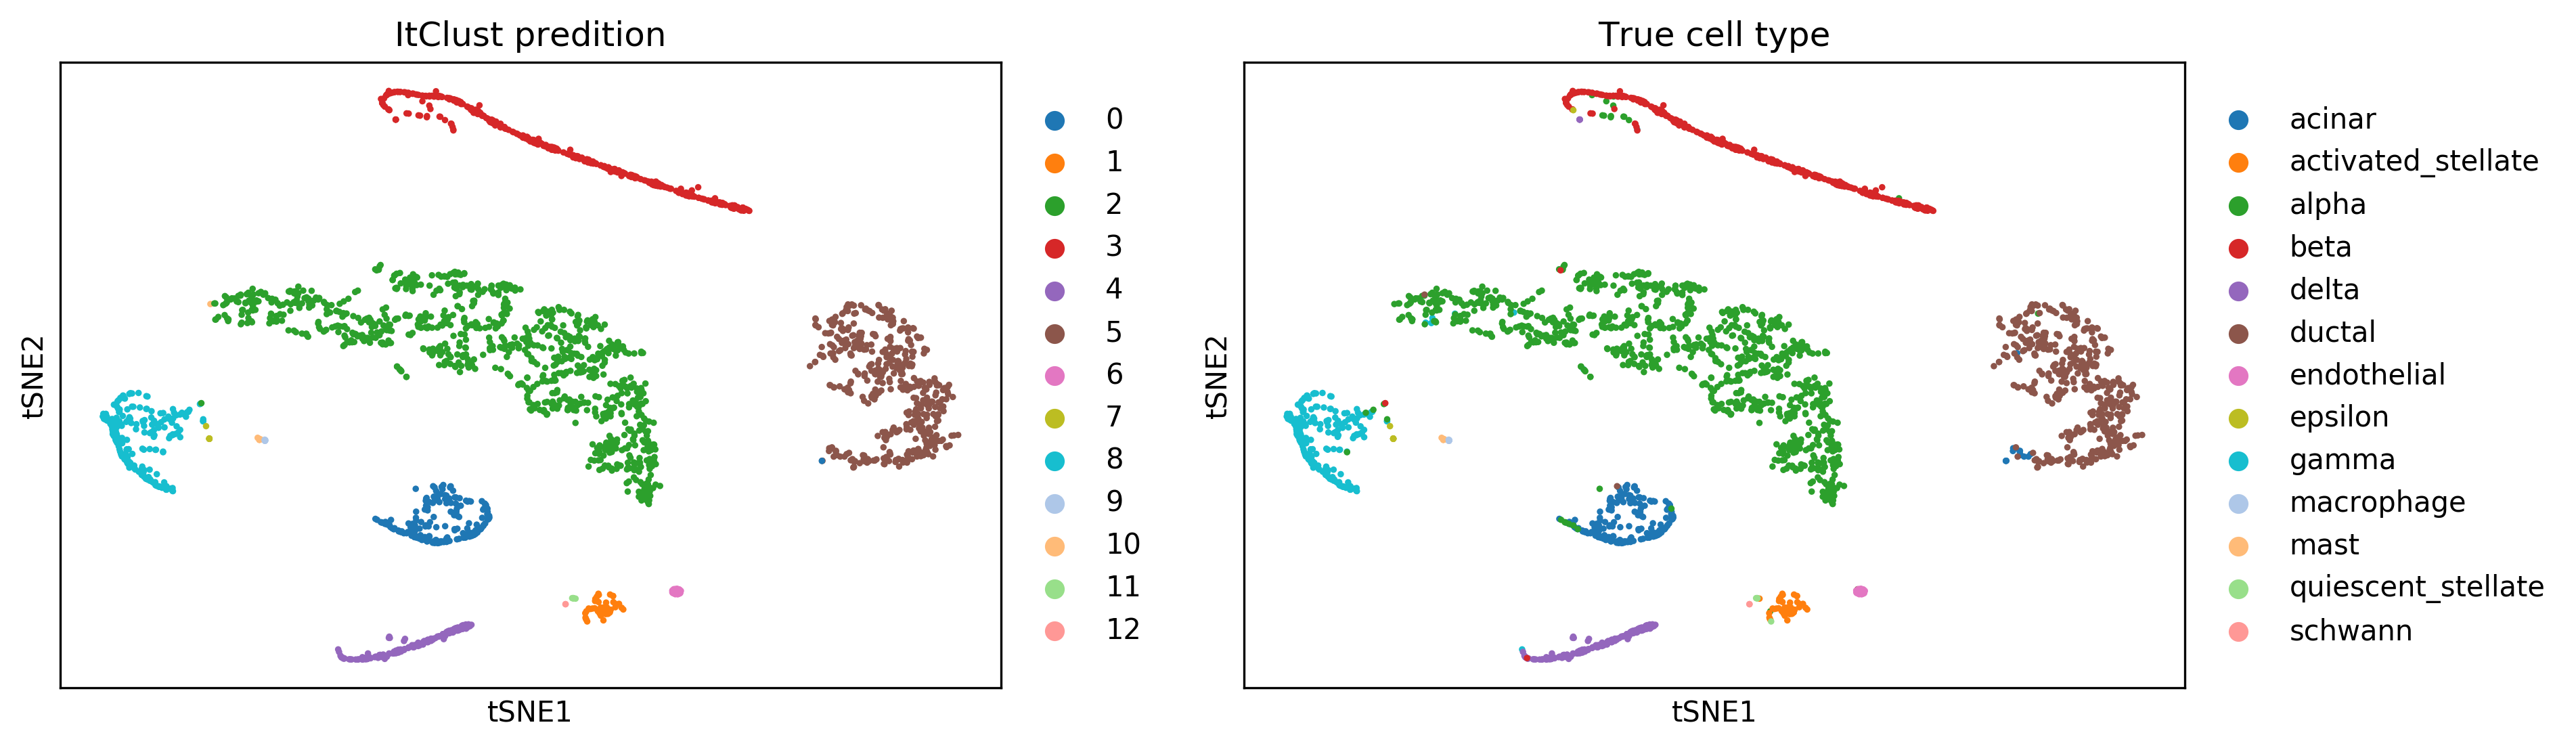

In [24]:
import matplotlib
matplotlib.use("Agg")
matplotlib.rcParams['figure.dpi']= 300
colors_use=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896','#bec1d4','#bb7784','#4a6fe3','#FFFF00''#111010']
# Run t-SNE
clf.adata_test.obsm['X_tsne']=clf.tSNE()
num_celltype=len(clf.adata_test.obs["celltype"].unique())
clf.adata_test.uns["celltype_colors"]=list(colors_use[:num_celltype])
clf.adata_test.uns["decisy_trans_True_colors"]=list(colors_use[:num_celltype])
sc.pl.tsne(clf.adata_test,color=["decisy_trans_True","celltype"],title=["ItClust predition","True cell type"],show=True,size=50000/clf.adata_test.shape[0])

#### 5.2 U-map

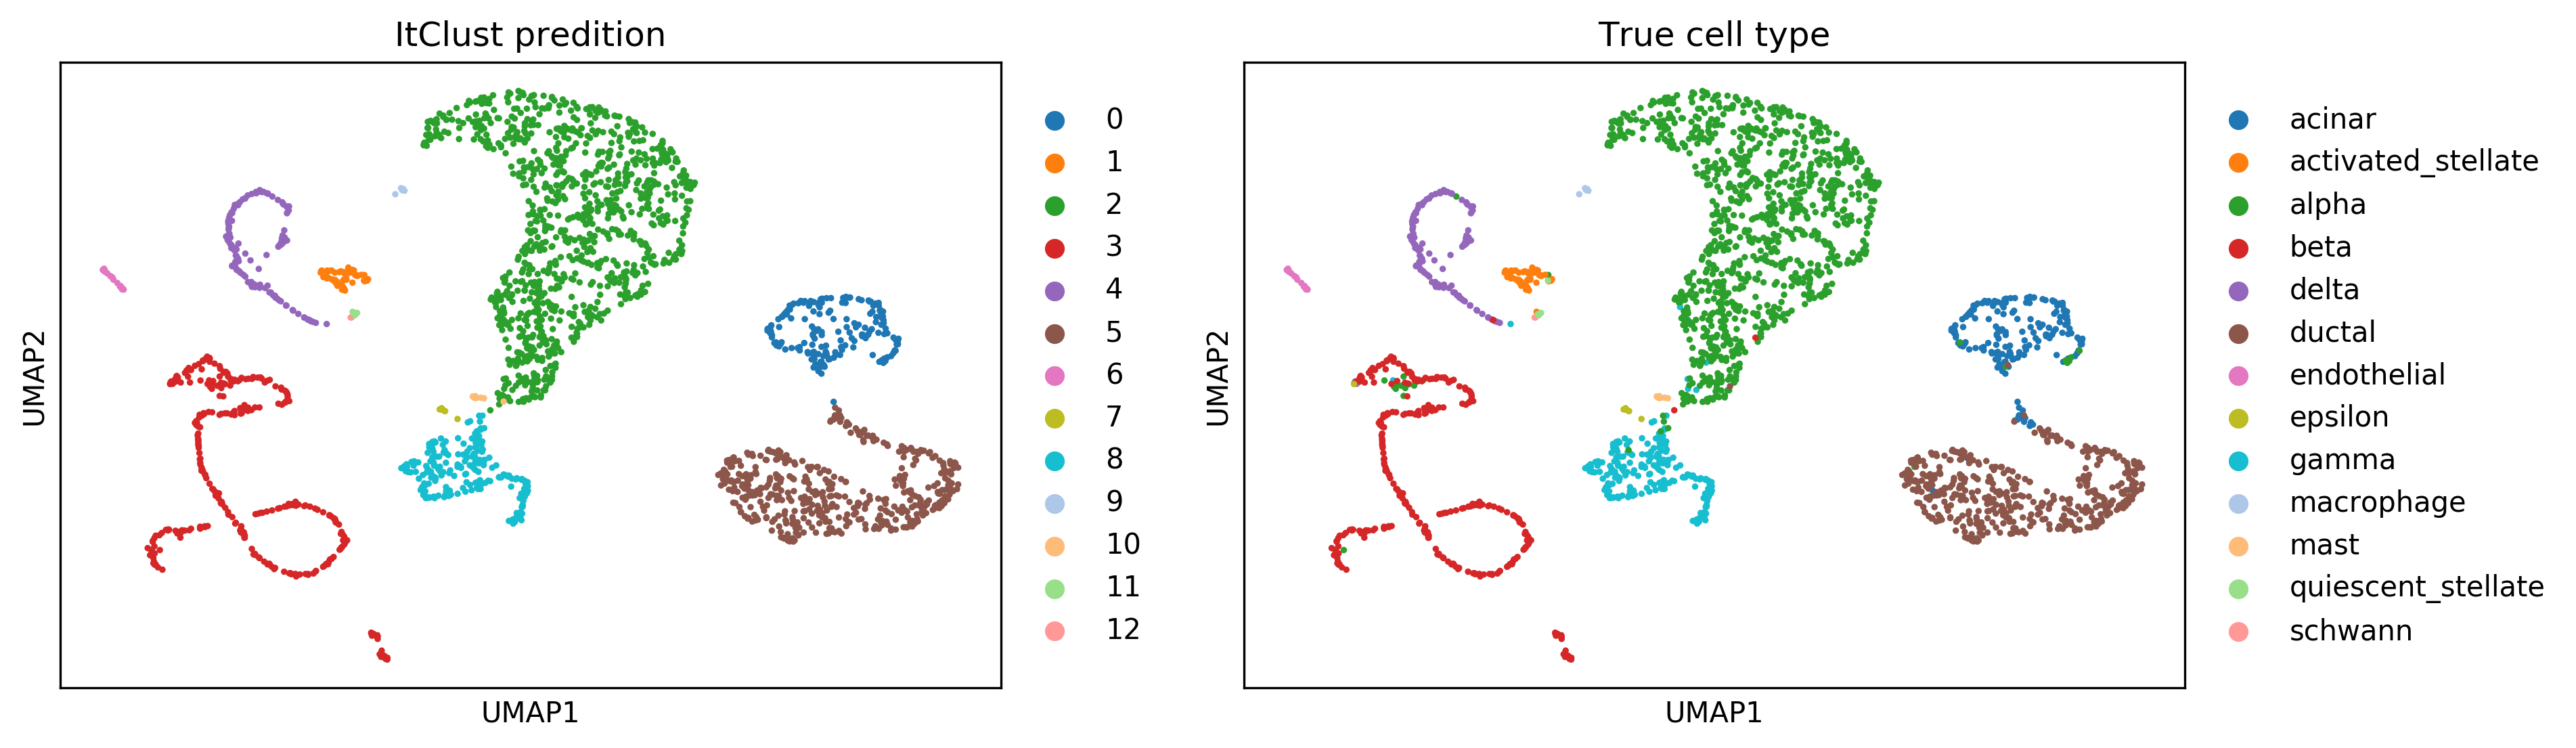

In [25]:
clf.adata_test.obsm['X_umap']
sc.pl.umap(clf.adata_test,color=["decisy_trans_True","celltype"],show=True,save=None,title=["ItClust predition","True cell type"],size=50000/adata_test.shape[0])